In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("garments_worker_productivity.csv")

## Data Exploration

In [3]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
data.date

0        1/1/2015
1        1/1/2015
2        1/1/2015
3        1/1/2015
4        1/1/2015
          ...    
1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, Length: 1197, dtype: object

In [7]:
##Fill in work in progress values 
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

## if there is an NA for WIP it can be replaced with 0 no WIP 

In [8]:
data.fillna(0, inplace = True)

In [9]:
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [10]:
data.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [11]:
data.loc[:,'department'] = data.loc[:,'department'].str.strip()

In [12]:
data.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

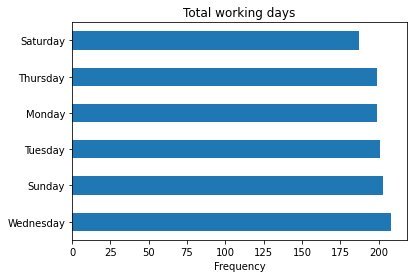

In [13]:
data['day'].value_counts().plot(kind='barh')
plt.title("Total working days")
plt.xlabel('Frequency')
plt.show()

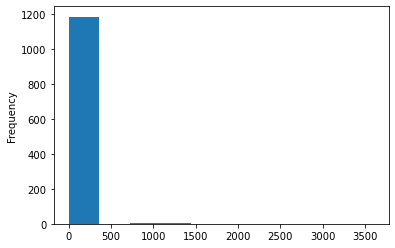

In [14]:
data['incentive'].plot(kind='hist')
plt.show()

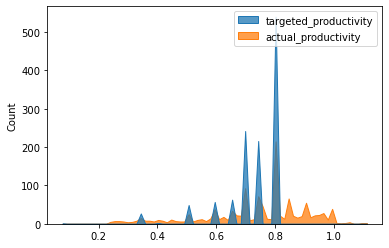

In [15]:
sns.histplot(data=data[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

Convert Qualititative objects to binary if possible

In [16]:
data1 = pd.get_dummies(data.quarter)
data2 = pd.get_dummies(data.department)
data3 = pd.get_dummies(data.day)

In [17]:
data = pd.concat([data,data1,data2,data3],axis=1)

In [18]:
data.drop(columns=['quarter'], inplace = True)
data.drop(columns=['department'], inplace = True)
data.drop(columns=['day'], inplace = True)

In [19]:
data

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,Quarter4,Quarter5,finishing,sweing,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1/1/2015,1,0.75,3.94,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,10,0.75,2.90,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1193,3/11/2015,8,0.70,3.90,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1194,3/11/2015,7,0.65,3.90,0.0,960,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1195,3/11/2015,9,0.75,2.90,0.0,1800,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [78]:
data1 = data.iloc[:,:12]
data1.to_csv('data1FNCE2421.csv')

<AxesSubplot:>

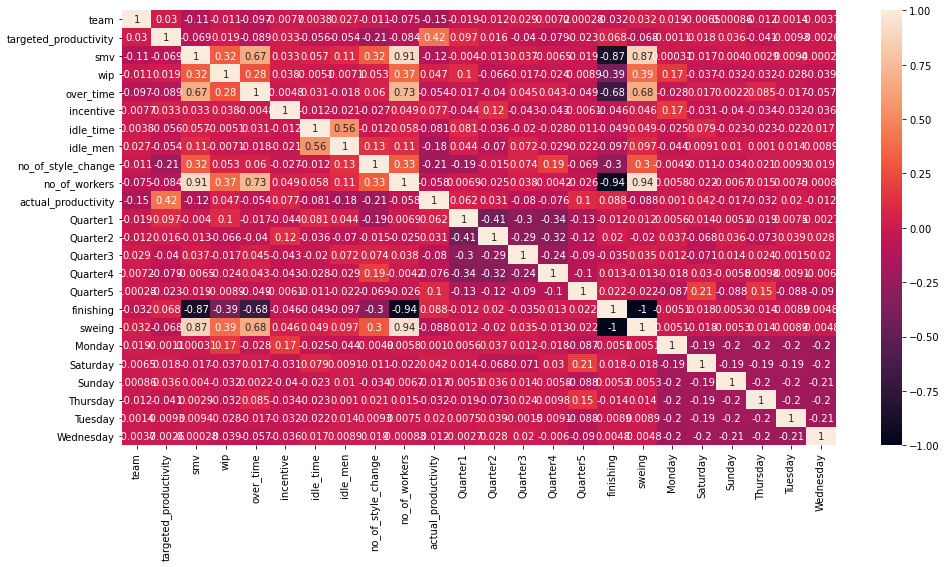

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

## see relationships between OT and allocated time for a task  OT a # of workers 

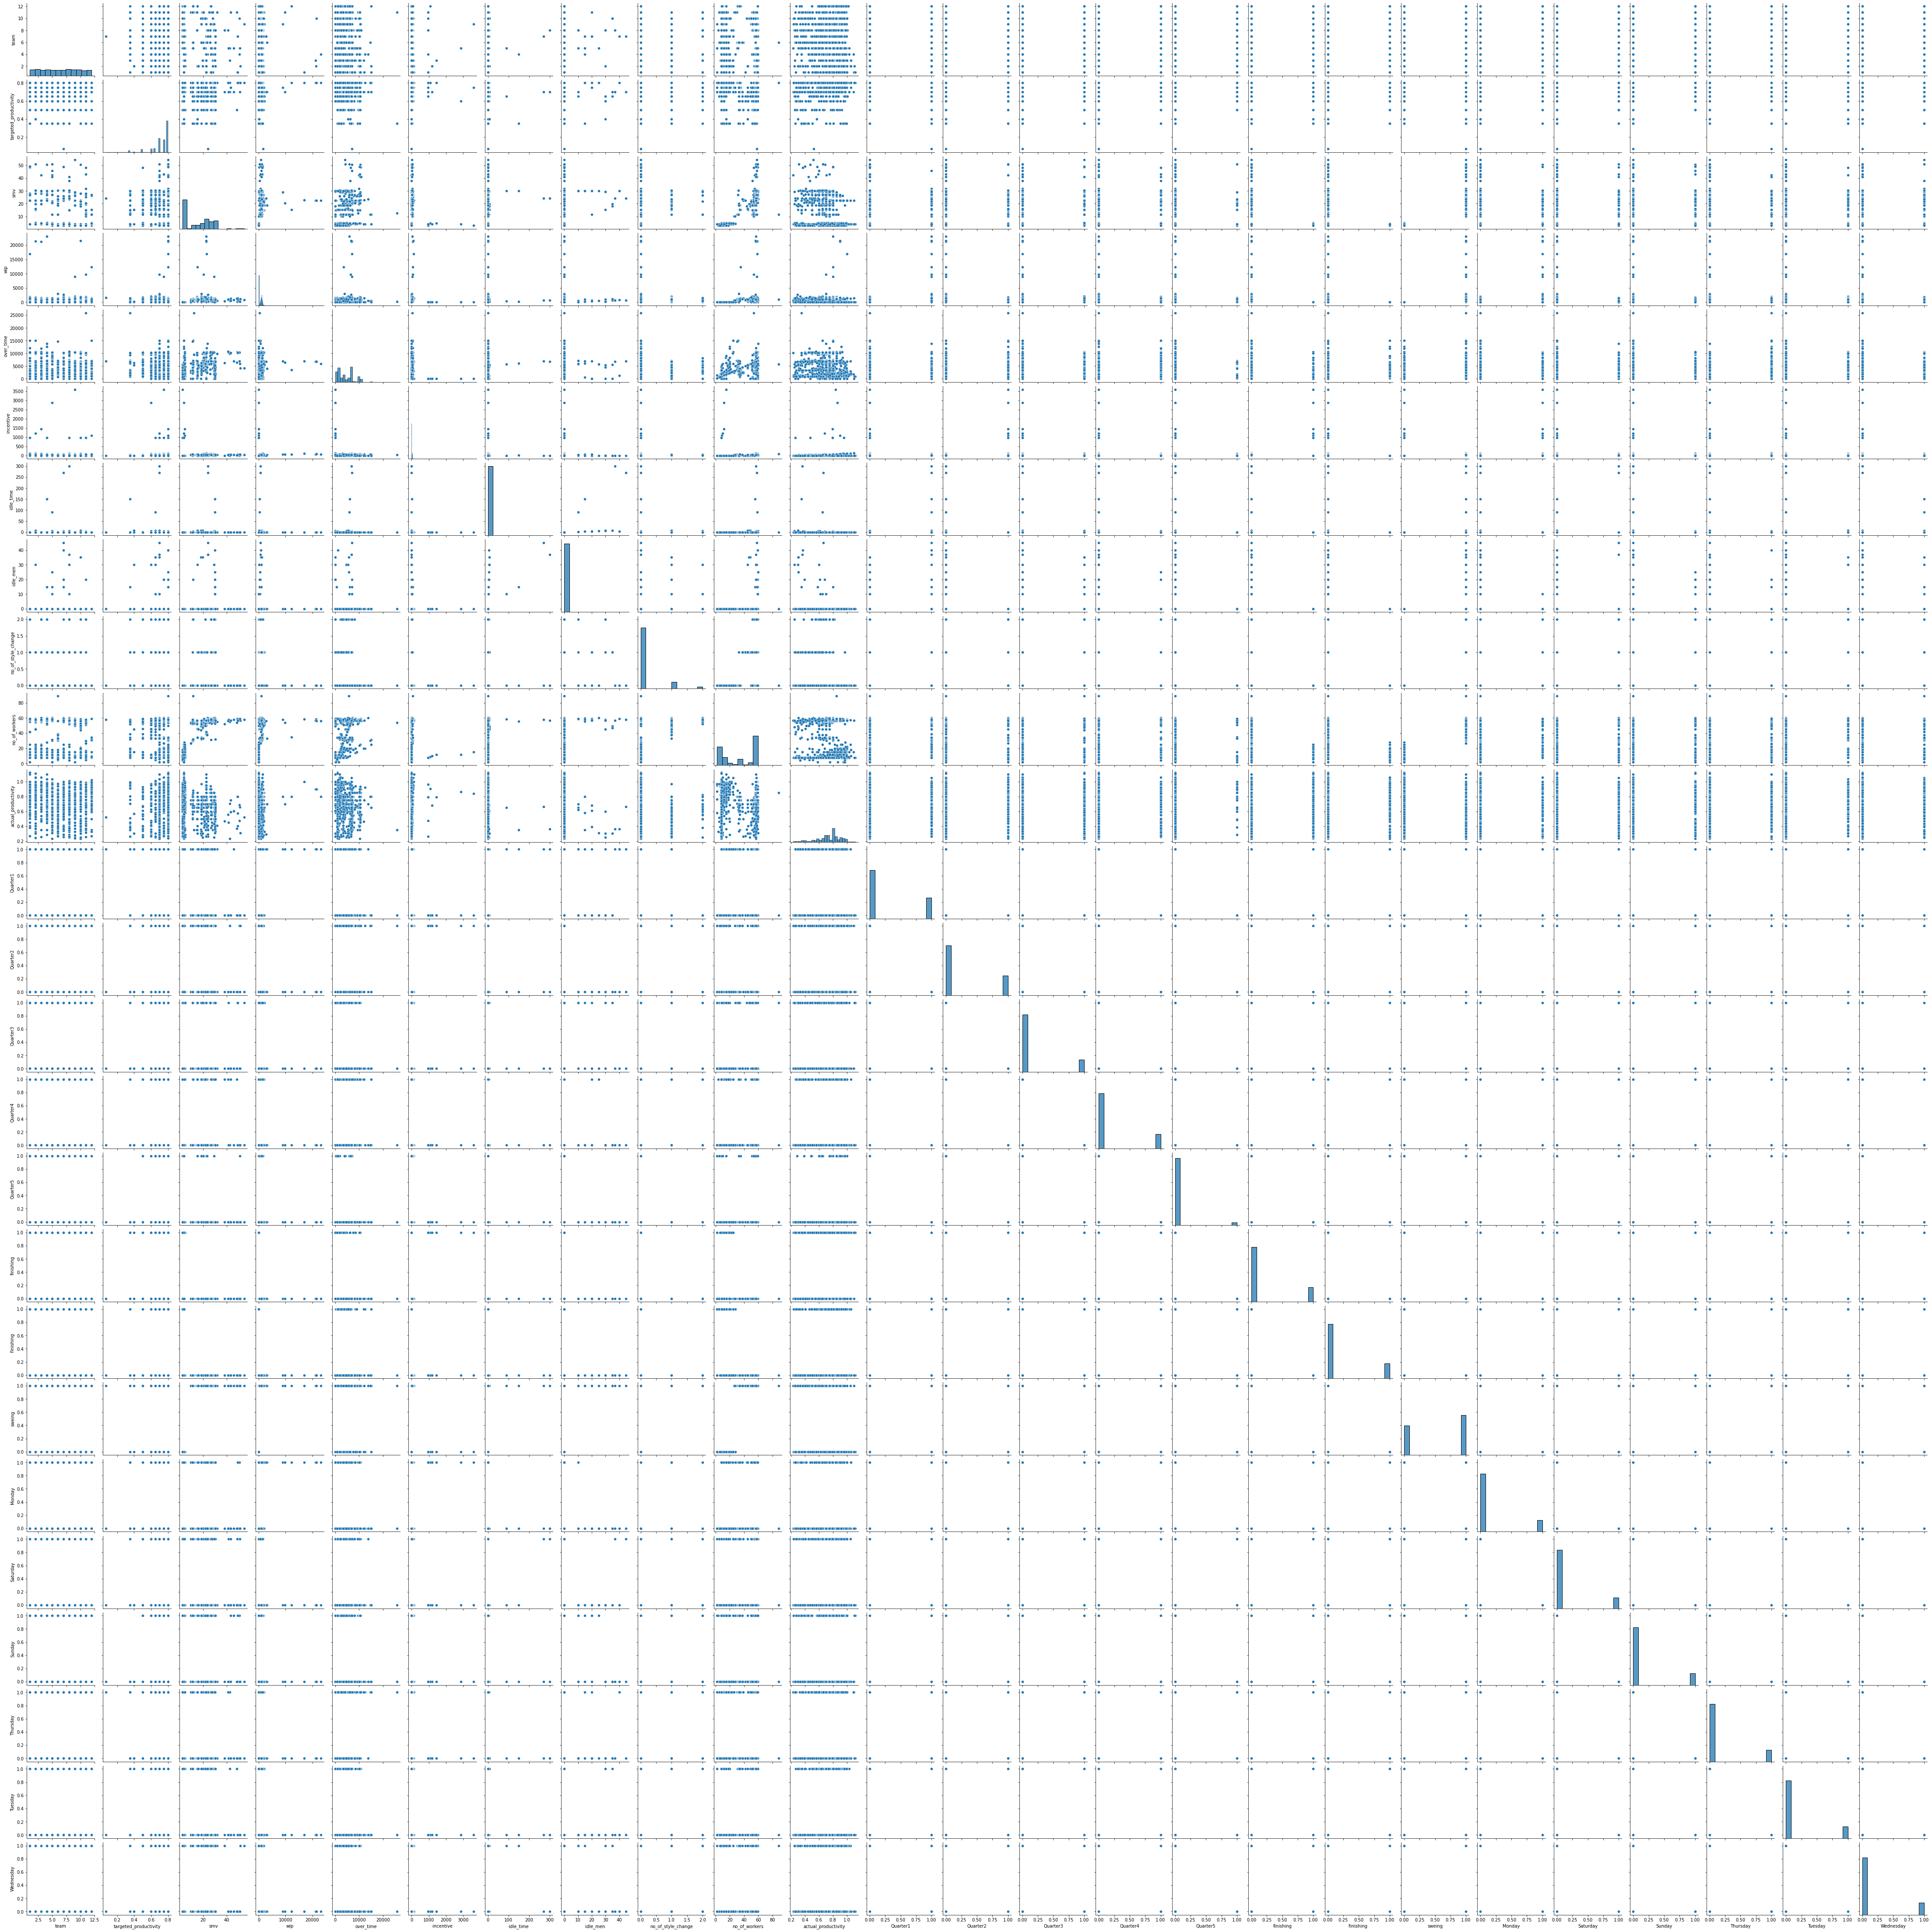

In [20]:
## Pairplot 
sns.pairplot(data=data)

In [33]:
y = data['actual_productivity']
x = data.iloc[:,:11]

In [ ]:
x = data.drop('actual_productivity', axis = 1)

In [32]:
data.iloc[:,:11]

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,2015-01-01,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,2015-01-01,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,2015-01-01,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,2015-01-01,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,2015-01-01,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0
1193,2015-03-11,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0
1194,2015-03-11,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0
1195,2015-03-11,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0


In [22]:
data.dtypes

data['date'] = pd.to_datetime(data['date'])

Training / Testing 

In [51]:
# splitting data 80/20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score

In [53]:
x_test2 = x_test.drop('date', axis =1)
x_train2 = x_train.drop('date', axis = 1)

In [79]:
data3 = x_test2
data3.to_csv('data3FNCE2421test.csv')

In [64]:
clf = LinearRegression()
clf.fit(x_train2, y_train)
y_pred_linear=clf.predict(x_test2)
acc_linear=round( clf.score(x_train2, y_train) * 100, 2)
print ('score:'+str(acc_linear) + ' percent')

score:27.28 percent


In [55]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(x_train2, y_train)
y_pred_rf=clf.predict(x_test2)
acc_rf= round(clf.score(x_train2, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 83 % 



In [66]:
clf=DecisionTreeRegressor()
clf.fit(x_train2, y_train)
y_pred_dt= clf.predict(x_test2)
acc_dt = round( clf.score(x_train2, y_train) * 100, 2)
print (str(acc_dt) + ' percent')

87.64 percent


In [41]:
Result = pd.DataFrame({
        "Date": x_test.date.astype(str),
        "Predicted_productivity": y_pred_rf
    })

Result

,Date,Predicted_productivity
700,2015-02-10,0.800398
621,2015-02-05,0.953758
319,2015-01-19,0.725965
837,2015-02-18,0.680852
761,2015-02-14,0.608290
...,...,...
686,2015-02-09,0.699433
906,2015-02-24,0.781392
866,2015-02-22,0.718094
1128,2015-03-09,0.805898
